In [53]:
#Import Python Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
# Load tweet data with correct encoding to avoid Unicode errors 
tweets_df = pd.read_csv(
    '../data/raw/bitcoin_tweets1000000.csv',   # Path to your tweets CSV
    encoding='ISO-8859-1'                      # Fix UnicodeDecodeError
)

# Load bitcoin price data (default encoding works for most CSVs) 
price_df = pd.read_csv(
    '../data/raw/btcusd_1-min_data.csv'        # Path to your price CSV
)

# Show the first 5 rows of each dataset to make sure data loaded correctly 
display(tweets_df.head())
display(price_df.head())

C:\Users\Feryel Gritli\AppData\Local\Temp\ipykernel_23160\656591203.py:2: DtypeWarning: Columns (0,5,6,7,8,13) have mixed types. Specify dtype option on import or set low_memory=False.
  tweets_df = pd.read_csv(


,Unnamed: 0,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,cleanText,Polarity Score,sentiment
0,0,DeSota Wilson,"Atlanta, GA","Biz Consultant, real estate, fintech, startups...",2009-04-26 20:05:09,8534.0,7605,4838,False,2021-02-10 23:59:04,Blue Ridge Bank shares halted by NYSE after #b...,['bitcoin'],Twitter Web App,False,blue ridge bank shares halted nyse bitcoin atm...,0.00,0.0
1,1,CryptoND,NaN,ð BITCOINLIVE is a Dutch platform aimed at ...,2019-10-17 20:12:10,6769.0,1532,25483,False,2021-02-10 23:58:48,"ð Today, that's this #Thursday, we will do ...","['Thursday', 'Btc', 'wallet', 'security']",Twitter for Android,False,today thursday take friend leowandersleb btc w...,0.00,0.0
2,2,Tdlmatias,"London, England","IM Academy : The best #forex, #SelfEducation, ...",2014-11-10 10:50:37,128.0,332,924,False,2021-02-10 23:54:48,"Guys evening, I have read this article about B...",NaN,Twitter Web App,False,guys evening read article btc would like share,0.00,0.0
3,3,Crypto is the future,NaN,I will post a lot of buying signals for BTC tr...,2019-09-28 16:48:12,625.0,129,14,False,2021-02-10 23:54:33,$BTC A big chance in a billion! Price: \487264...,"['Bitcoin', 'FX', 'BTC', 'crypto']",dlvr.it,False,btc big chance billion price bitcoin btc crypto,0.00,0.0
4,4,Alex Kirchmaier ð¦ð¹ð¸ðª #FactsSupersp...,Europa,Co-founder @RENJERJerky | Forbes 30Under30 | I...,2016-02-03 13:15:55,1249.0,1472,10482,False,2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...,['BTC'],Twitter Web App,False,network secured nodes today soon biggest bears...,-0.25,0.0


,Timestamp,Open,High,Low,Close,Volume
0,1.325412e+09,4.58,4.58,4.58,4.58,0.0
1,1.325412e+09,4.58,4.58,4.58,4.58,0.0
2,1.325412e+09,4.58,4.58,4.58,4.58,0.0
3,1.325412e+09,4.58,4.58,4.58,4.58,0.0
4,1.325412e+09,4.58,4.58,4.58,4.58,0.0


In [55]:
# Remove 'Unnamed: 0' column if it exists in the tweets data 
if 'Unnamed: 0' in tweets_df.columns:
    tweets_df = tweets_df.drop(columns=['Unnamed: 0'])

# Check columns after removal
print("Tweets columns:", tweets_df.columns)

Tweets columns: Index(['user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'is_retweet', 'cleanText',
       'Polarity Score', 'sentiment'],
      dtype='object')


In [56]:
# Convert 'date' column in tweets to datetime type 
tweets_df['date'] = pd.to_datetime(tweets_df['date'], errors='coerce')

# Confirm conversion by displaying the first few dates
print(tweets_df['date'].head())

0   2021-02-10 23:59:04
1   2021-02-10 23:58:48
2   2021-02-10 23:54:48
3   2021-02-10 23:54:33
4   2021-02-10 23:54:06
Name: date, dtype: datetime64[ns]


In [57]:
# Check for missing (null) values in both datasets 
print("Missing values in tweets_df:\n", tweets_df.isnull().sum())
print("\nMissing values in price_df:\n", price_df.isnull().sum())

Missing values in tweets_df:
 user_name               45
user_location       463389
user_description    110800
user_created            25
user_followers          25
user_friends            25
user_favourites         28
user_verified           29
date                    39
text                    32
hashtags             16826
source                3392
is_retweet              79
cleanText               38
Polarity Score          37
sentiment               39
dtype: int64

Missing values in price_df:
 Timestamp    0
Open         0
High         0
Low          0
Close        0
Volume       0
dtype: int64


In [58]:
# Convert 'Timestamp' to readable datetime in price_df 
price_df['date'] = pd.to_datetime(price_df['Timestamp'], unit='s')

# Show first few rows to confirm
print(price_df[['Timestamp', 'date']].head())

      Timestamp                date
0  1.325412e+09 2012-01-01 10:01:00
1  1.325412e+09 2012-01-01 10:02:00
2  1.325412e+09 2012-01-01 10:03:00
3  1.325412e+09 2012-01-01 10:04:00
4  1.325412e+09 2012-01-01 10:05:00


In [59]:
# Drop rows in tweets_df where 'date', 'text', 'sentiment', or 'Polarity Score' are missing 
tweets_df = tweets_df.dropna(subset=['date', 'text', 'sentiment', 'Polarity Score'])

# Show number of rows after dropping
print("Rows left after cleaning:", len(tweets_df))

Rows left after cleaning: 999981


In [60]:
# Show first 5 tweets and price records 👀*
display(tweets_df.head())
display(price_df.head())

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,cleanText,Polarity Score,sentiment
0,DeSota Wilson,"Atlanta, GA","Biz Consultant, real estate, fintech, startups...",2009-04-26 20:05:09,8534.0,7605,4838,False,2021-02-10 23:59:04,Blue Ridge Bank shares halted by NYSE after #b...,['bitcoin'],Twitter Web App,False,blue ridge bank shares halted nyse bitcoin atm...,0.00,0.0
1,CryptoND,NaN,ð BITCOINLIVE is a Dutch platform aimed at ...,2019-10-17 20:12:10,6769.0,1532,25483,False,2021-02-10 23:58:48,"ð Today, that's this #Thursday, we will do ...","['Thursday', 'Btc', 'wallet', 'security']",Twitter for Android,False,today thursday take friend leowandersleb btc w...,0.00,0.0
2,Tdlmatias,"London, England","IM Academy : The best #forex, #SelfEducation, ...",2014-11-10 10:50:37,128.0,332,924,False,2021-02-10 23:54:48,"Guys evening, I have read this article about B...",NaN,Twitter Web App,False,guys evening read article btc would like share,0.00,0.0
3,Crypto is the future,NaN,I will post a lot of buying signals for BTC tr...,2019-09-28 16:48:12,625.0,129,14,False,2021-02-10 23:54:33,$BTC A big chance in a billion! Price: \487264...,"['Bitcoin', 'FX', 'BTC', 'crypto']",dlvr.it,False,btc big chance billion price bitcoin btc crypto,0.00,0.0
4,Alex Kirchmaier ð¦ð¹ð¸ðª #FactsSupersp...,Europa,Co-founder @RENJERJerky | Forbes 30Under30 | I...,2016-02-03 13:15:55,1249.0,1472,10482,False,2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...,['BTC'],Twitter Web App,False,network secured nodes today soon biggest bears...,-0.25,0.0


,Timestamp,Open,High,Low,Close,Volume,date
0,1.325412e+09,4.58,4.58,4.58,4.58,0.0,2012-01-01 10:01:00
1,1.325412e+09,4.58,4.58,4.58,4.58,0.0,2012-01-01 10:02:00
2,1.325412e+09,4.58,4.58,4.58,4.58,0.0,2012-01-01 10:03:00
3,1.325412e+09,4.58,4.58,4.58,4.58,0.0,2012-01-01 10:04:00
4,1.325412e+09,4.58,4.58,4.58,4.58,0.0,2012-01-01 10:05:00


In [61]:
# Basic summary statistics for numeric columns in tweets and price data 
print("Tweets DataFrame summary:")
display(tweets_df.describe())
print("\nPrice DataFrame summary:")
display(price_df.describe())

Tweets DataFrame summary:


,date,Polarity Score,sentiment
count,999981,999981.000000,999981.000000
mean,2021-07-09 05:49:49.461447424,0.144693,0.472945
min,2021-02-05 10:52:04,-1.000000,0.000000
25%,2021-06-23 16:56:04,0.000000,0.000000
50%,2021-07-22 10:25:13,0.000000,0.000000
75%,2021-08-06 22:01:26,0.286508,1.000000
max,2021-08-21 12:58:29,1.000000,1.000000
std,NaN,0.271045,0.499268



Price DataFrame summary:


,Timestamp,Open,High,Low,Close,Volume,date
count,7.121970e+06,7.121970e+06,7.121970e+06,7.121970e+06,7.121970e+06,7.121970e+06,7121970
mean,1.539073e+09,1.879263e+04,1.879977e+04,1.878527e+04,1.879263e+04,5.231391e+00,2018-10-09 08:14:38.216287232
min,1.325412e+09,3.800000e+00,3.800000e+00,3.800000e+00,3.800000e+00,0.000000e+00,2012-01-01 10:01:00
25%,1.432242e+09,4.310400e+02,4.312000e+02,4.309500e+02,4.310300e+02,1.799802e-02,2015-05-21 20:53:15
50%,1.539071e+09,6.825355e+03,6.830000e+03,6.820460e+03,6.825415e+03,4.511385e-01,2018-10-09 07:45:30
75%,1.645901e+09,2.880500e+04,2.881500e+04,2.879300e+04,2.880500e+04,2.986511e+00,2022-02-26 18:37:45
max,1.752800e+09,1.231100e+05,1.232360e+05,1.230070e+05,1.232360e+05,5.853852e+03,2025-07-18 00:50:00
std,1.233591e+08,2.630484e+04,2.631269e+04,2.629682e+04,2.630483e+04,2.235301e+01,NaN


In [62]:
print("Tweets date range:", tweets_df['date'].min(), "to", tweets_df['date'].max())
print("Price date range:", price_df['date'].min(), "to", price_df['date'].max())
print("Sentiment distribution:")
print(tweets_df['sentiment'].value_counts())

Tweets date range: 2021-02-05 10:52:04 to 2021-08-21 12:58:29
Price date range: 2012-01-01 10:01:00 to 2025-07-18 00:50:00
Sentiment distribution:
sentiment
0.0    527045
1.0    472936
Name: count, dtype: int64


In [63]:
# Show the last few price data rows sorted by date (to find weird future dates) (I found dates of 2025 today's date and that was weird[no biggie tho])
print(price_df.sort_values('date', ascending=False).head(10))

            Timestamp      Open      High       Low     Close    Volume  \
7121969  1.752800e+09  119755.0  119755.0  119629.0  119653.0  0.530814   
7121968  1.752800e+09  119792.0  119792.0  119756.0  119756.0  0.121148   
7121967  1.752800e+09  119787.0  119834.0  119786.0  119790.0  0.400365   
7121966  1.752800e+09  119821.0  119822.0  119787.0  119787.0  0.193167   
7121965  1.752800e+09  119808.0  119841.0  119794.0  119815.0  2.662110   
7121964  1.752800e+09  119822.0  119826.0  119796.0  119808.0  0.253218   
7121963  1.752799e+09  119803.0  119820.0  119796.0  119820.0  0.248294   
7121962  1.752799e+09  119750.0  119833.0  119750.0  119809.0  1.192877   
7121961  1.752799e+09  119722.0  119747.0  119721.0  119747.0  0.556865   
7121960  1.752799e+09  119704.0  119727.0  119703.0  119721.0  0.152351   

                       date  
7121969 2025-07-18 00:50:00  
7121968 2025-07-18 00:49:00  
7121967 2025-07-18 00:48:00  
7121966 2025-07-18 00:47:00  
7121965 2025-07-18 00:46

In [64]:
import pandas as pd

# Set a cutoff date (e.g., today)
today = pd.to_datetime("today")

# Keep only rows where date is not in the future
price_df = price_df[price_df['date'] <= today]

# Check new max date
print("Fixed price date range:", price_df['date'].min(), "to", price_df['date'].max())
print(price_df.sort_values('date').head(10))

Fixed price date range: 2012-01-01 10:01:00 to 2025-07-18 00:50:00
      Timestamp  Open  High   Low  Close  Volume                date
0  1.325412e+09  4.58  4.58  4.58   4.58     0.0 2012-01-01 10:01:00
1  1.325412e+09  4.58  4.58  4.58   4.58     0.0 2012-01-01 10:02:00
2  1.325412e+09  4.58  4.58  4.58   4.58     0.0 2012-01-01 10:03:00
3  1.325412e+09  4.58  4.58  4.58   4.58     0.0 2012-01-01 10:04:00
4  1.325412e+09  4.58  4.58  4.58   4.58     0.0 2012-01-01 10:05:00
5  1.325412e+09  4.58  4.58  4.58   4.58     0.0 2012-01-01 10:06:00
6  1.325412e+09  4.58  4.58  4.58   4.58     0.0 2012-01-01 10:07:00
7  1.325412e+09  4.58  4.58  4.58   4.58     0.0 2012-01-01 10:08:00
8  1.325413e+09  4.58  4.58  4.58   4.58     0.0 2012-01-01 10:09:00
9  1.325413e+09  4.58  4.58  4.58   4.58     0.0 2012-01-01 10:10:00


In [65]:
print("Fixed price date range:", price_df['date'].min(), "to", price_df['date'].max())

Fixed price date range: 2012-01-01 10:01:00 to 2025-07-18 00:50:00


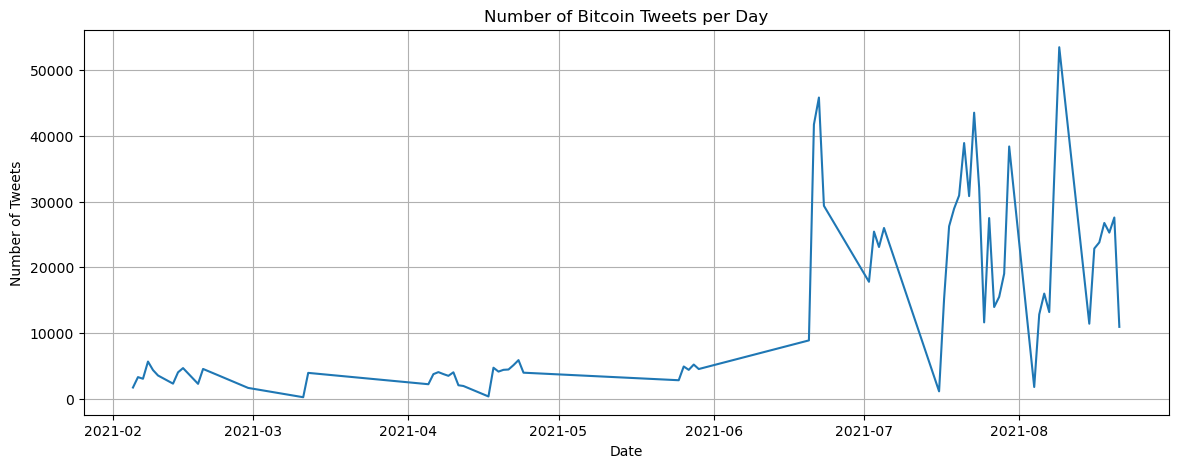

In [66]:
import matplotlib.pyplot as plt

# Count number of tweets per day 
tweets_by_day = tweets_df['date'].dt.date.value_counts().sort_index()

plt.figure(figsize=(14,5))
tweets_by_day.plot(kind='line')
plt.title("Number of Bitcoin Tweets per Day")
plt.xlabel("Date")
plt.ylabel("Number of Tweets")
plt.grid(True)
plt.show()

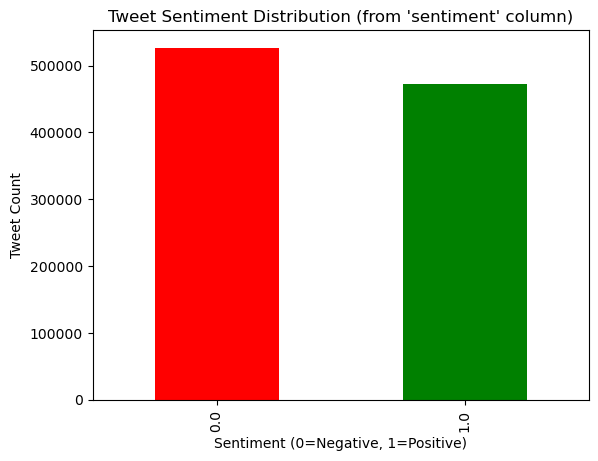

In [67]:
# 0 = negative, 1 = positive
# Sentiment column is binary (probably from an automatic tool or labeling)
sentiment_counts = tweets_df['sentiment'].value_counts()
sentiment_counts.plot(kind='bar', color=['red', 'green'])
plt.title("Tweet Sentiment Distribution (from 'sentiment' column)")
plt.xlabel("Sentiment (0=Negative, 1=Positive)")
plt.ylabel("Tweet Count")
plt.show()

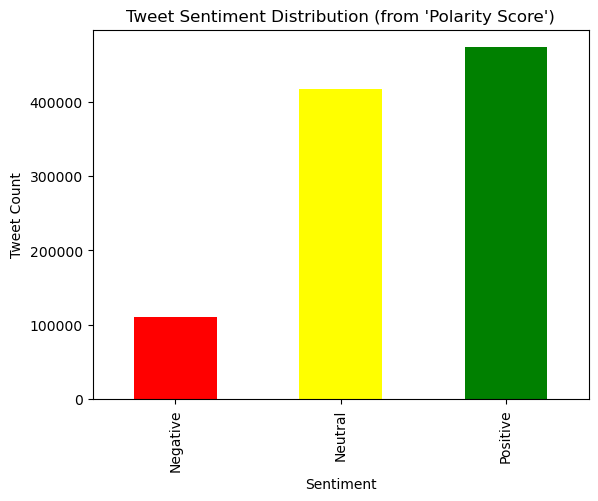

In [68]:
# Categorize each tweet as Negative, Neutral, or Positive based on polarity score
# Polarity score lets you see the “neutral” tweets too
def polarity_to_label(score):
    if score < 0:
        return 'Negative'
    elif score > 0:
        return 'Positive'
    else:
        return 'Neutral'

tweets_df['polarity_label'] = tweets_df['Polarity Score'].apply(polarity_to_label)

# Count of each category
polarity_counts = tweets_df['polarity_label'].value_counts().reindex(['Negative','Neutral','Positive'], fill_value=0)
polarity_counts.plot(kind='bar', color=['red', 'yellow', 'green'])
plt.title("Tweet Sentiment Distribution (from 'Polarity Score')")
plt.xlabel("Sentiment")
plt.ylabel("Tweet Count")
plt.show()

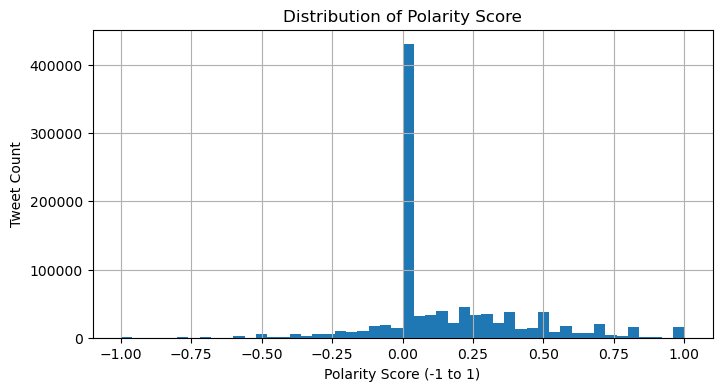

In [69]:
tweets_df['Polarity Score'].hist(bins=50, figsize=(8,4))
plt.title("Distribution of Polarity Score")
plt.xlabel("Polarity Score (-1 to 1)")
plt.ylabel("Tweet Count")
plt.show()

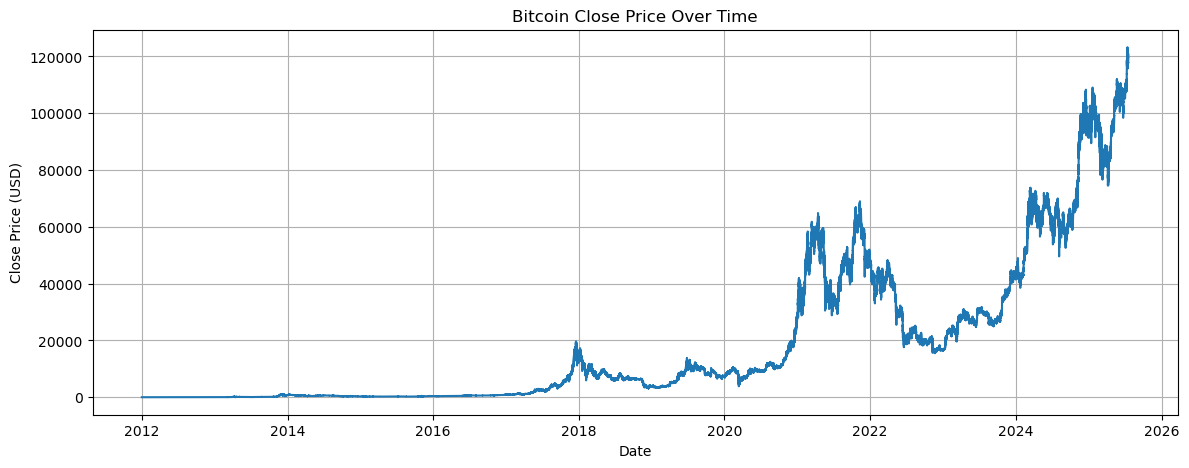

In [70]:
plt.figure(figsize=(14,5))
plt.plot(price_df['date'], price_df['Close'])
plt.title("Bitcoin Close Price Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price (USD)")
plt.grid(True)
plt.show()

#What Do These Plots Tell You?
#Tweet volume spikes = times of high community attention (news, crashes, surges).
#Sentiment distribution = market “mood”.
#Polarity spread = how extreme or calm the conversation is.
#Price chart = what was happening with Bitcoin in the same period.